In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#loading WDC-EDML tiepoints and new WD layercount
wdc_edml_tiepoints = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Tiepoints/WDC-EDML_WDC-EDC_WDC-TALDICE.xlsx', sheet_name=1, skiprows=37, usecols= [0,1,2,3], names=['WDC m', 'EDML m', 'WD2014 age', 'AICC2012 age'])
new_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/WD LC/Updated_WD2014 Layer Count.tab', sep='\t', comment='#', names=['depth', 'age'])
wdc_edml_tiepoints['new_wdc age'] = np.interp(wdc_edml_tiepoints['WDC m'], new_wdc_count['depth'], new_wdc_count['age']*1000)

#remove values irrelevant
wdc_edml_tiepoints = wdc_edml_tiepoints[np.logical_and(wdc_edml_tiepoints['new_wdc age'] < 3800, wdc_edml_tiepoints['AICC2012 age'] < 3800, wdc_edml_tiepoints['WD2014 age'] < 3800)]

#loading EDML new layercount
EDML_reset_depth = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/EDML-GICC Errors/EDML_LayerCount_Revised.txt', sep='\t', comment='#')
EDML_reset_depth

#load EDML original layercount
edml_gicc05 = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=0, skiprows=1, usecols=[0,1])
edml_gicc05['yr b1950'] = edml_gicc05['Year b2k'] - 50

edml_half = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=1, skiprows=1)
edml_half['yr b1950'] = edml_half['Year b2k'] - 50

old_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/WDC/WD2014 Layer Count.tab', sep='\t', skiprows=52)

Text(0.5, 1.0, 'WDC-EDML New LC Age Diffs')

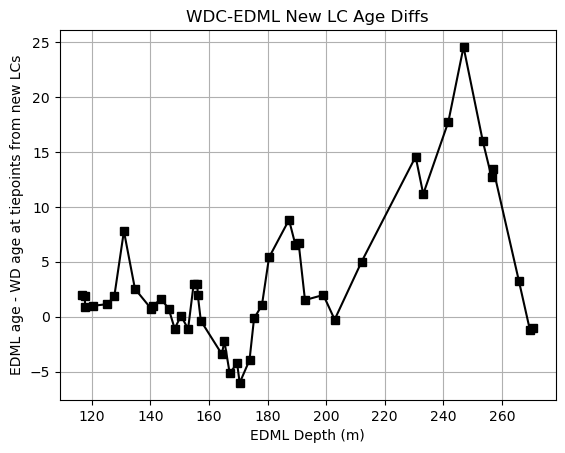

In [ ]:
#New LC comparison

wdc_edml_tiepoints['closest_edml_lc_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], EDML_reset_depth['Depth (m)'], EDML_reset_depth['age (b1950)']))

wdc_edml_tiepoints['age_diff'] = wdc_edml_tiepoints['closest_edml_lc_age'] - wdc_edml_tiepoints['new_wdc age']


plot_diff = wdc_edml_tiepoints[wdc_edml_tiepoints['EDML m'] < 272.3].copy(deep=True)

plt.plot(plot_diff['EDML m'], plot_diff['age_diff'], marker='s', linestyle='-', color='k')
plt.ylabel('EDML age - WD age at tiepoints from new LCs')
plt.xlabel('EDML Depth (m)')
plt.grid()
plt.title('WDC-EDML New LC Age Diffs')

Text(0.5, 1.0, 'WDC-EDML(gicc) OLD LC Age Diffs')

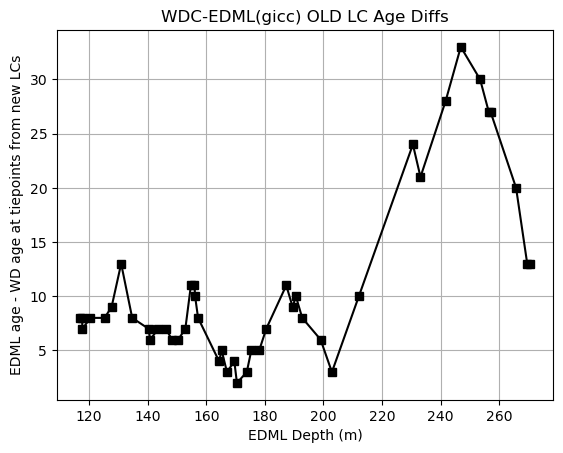

In [ ]:
#old LC comparison1

wdc_edml_tiepoints['closest_edml_half_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], edml_half['Depth (m)'], edml_half['yr b1950']))

wdc_edml_tiepoints['closest_edml_gicc_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], edml_gicc05['Depth (m)'], edml_gicc05['yr b1950']))

wdc_edml_tiepoints['closest_old_wdc_age'] = np.round(np.interp(wdc_edml_tiepoints['WDC m'], old_wdc_count['#Depth ice/snow [m]'], 1000*old_wdc_count['Cal age [ka BP] (ice age)']))

#####
wdc_edml_tiepoints['age_diff'] = wdc_edml_tiepoints['closest_edml_gicc_age'] - wdc_edml_tiepoints['closest_old_wdc_age']
plot_diff2 = wdc_edml_tiepoints[wdc_edml_tiepoints['EDML m'] < 272.3].copy(deep=True)
#####

plt.plot(plot_diff2['EDML m'], plot_diff2['age_diff'], marker='s', linestyle='-', color='k')
plt.ylabel('EDML age - WD age at tiepoints from new LCs')
plt.xlabel('EDML Depth (m)')
plt.grid()
plt.title('WDC-EDML(gicc) OLD LC Age Diffs')

Text(0.5, 1.0, 'WDC-EDML(gicc) OLD LC Age Diffs')

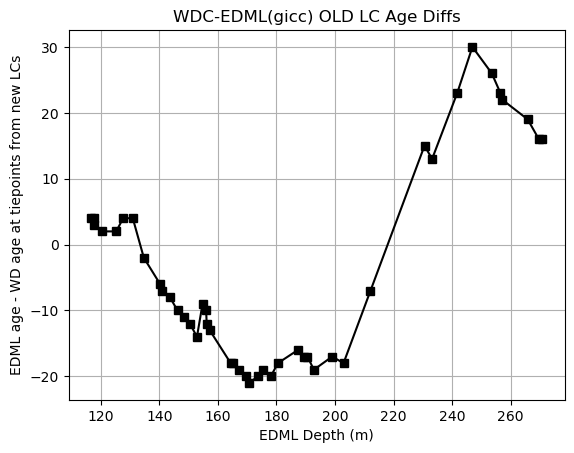

In [33]:
#old LC comparison2

wdc_edml_tiepoints['closest_edml_half_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], edml_half['Depth (m)'], edml_half['yr b1950']))

wdc_edml_tiepoints['closest_edml_gicc_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], edml_gicc05['Depth (m)'], edml_gicc05['yr b1950']))

wdc_edml_tiepoints['closest_old_wdc_age'] = np.round(np.interp(wdc_edml_tiepoints['WDC m'], old_wdc_count['#Depth ice/snow [m]'], 1000*old_wdc_count['Cal age [ka BP] (ice age)']))

#####
wdc_edml_tiepoints['age_diff'] = wdc_edml_tiepoints['closest_edml_half_age'] - wdc_edml_tiepoints['closest_old_wdc_age']
plot_diff3 = wdc_edml_tiepoints[wdc_edml_tiepoints['EDML m'] < 272.3].copy(deep=True)
#####

plt.plot(plot_diff3['EDML m'], plot_diff3['age_diff'], marker='s', linestyle='-', color='k')
plt.ylabel('EDML age - WD age at tiepoints from new LCs')
plt.xlabel('EDML Depth (m)')
plt.grid()
plt.title('WDC-EDML(gicc) OLD LC Age Diffs')

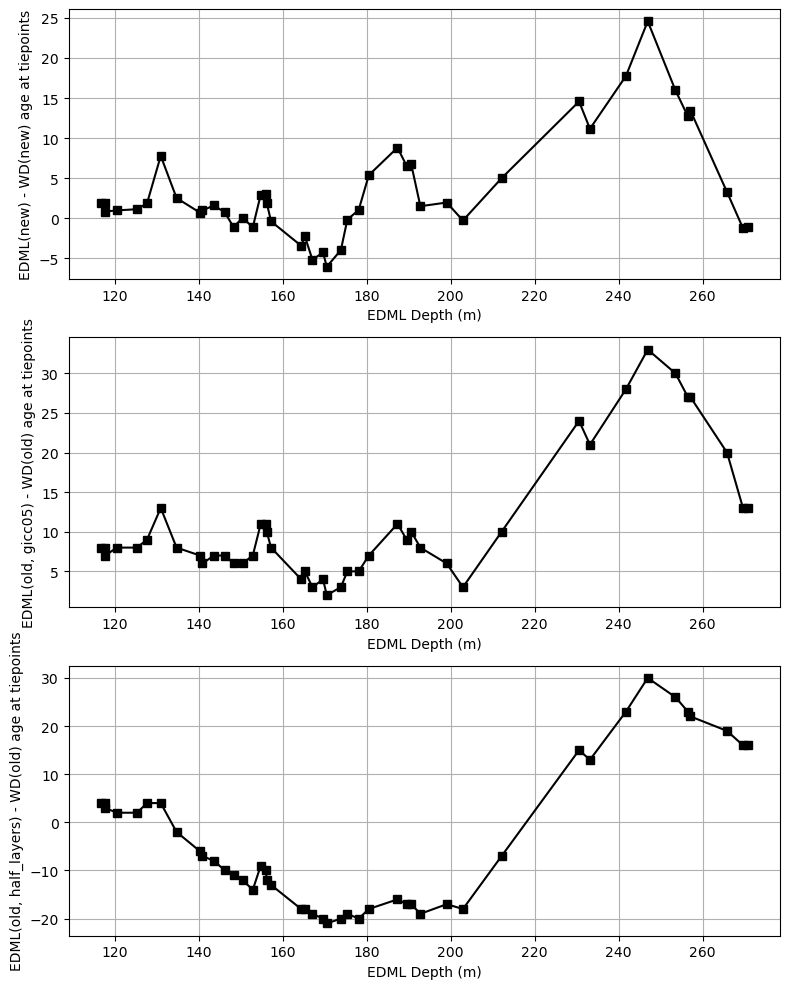

In [44]:
import matplotlib.pyplot as plt

# Create figure and 3 subplots (vertical layout)
fig, axs = plt.subplots(3, 1, figsize=(8, 10))  # 3 rows, 1 column

# Example: fill in your data here
# First subplot
axs[0].plot(plot_diff['EDML m'], plot_diff['age_diff'], marker='s', linestyle='-', color='k')  # Replace with your x and y data
axs[0].grid()
axs[0].set_ylabel('EDML(new) - WD(new) age at tiepoints')
axs[0].set_xlabel('EDML Depth (m)')

# Second subplot
axs[1].plot(plot_diff2['EDML m'], plot_diff2['age_diff'], marker='s', linestyle='-', color='k')  # Replace with your x and y data
axs[1].set_ylabel('EDML(old, gicc05) - WD(old) age at tiepoints')
axs[1].grid()
axs[1].set_xlabel('EDML Depth (m)')

# Third subplot
axs[2].plot(plot_diff3['EDML m'], plot_diff3['age_diff'], marker='s', linestyle='-', color='k')  # Replace with your x and y data
axs[2].set_ylabel('EDML(old, half_layers) - WD(old) age at tiepoints')
axs[2].grid()
axs[2].set_xlabel('EDML Depth (m)')

# Adjust layout so titles/labels don't overlap
plt.tight_layout()
plt.savefig('/Users/quinnmackay/Desktop/temp/WD-EDML Age Diff Comparisons.png', dpi=300)
plt.show()
